In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import lib
from lib import data_dis, data_ref, data_vst

In [12]:
import numpy as np
from ksvd import ApproximateKSVD
import nibabel as nib
import matplotlib.pyplot as plt

In [13]:
image = data_dis[0]

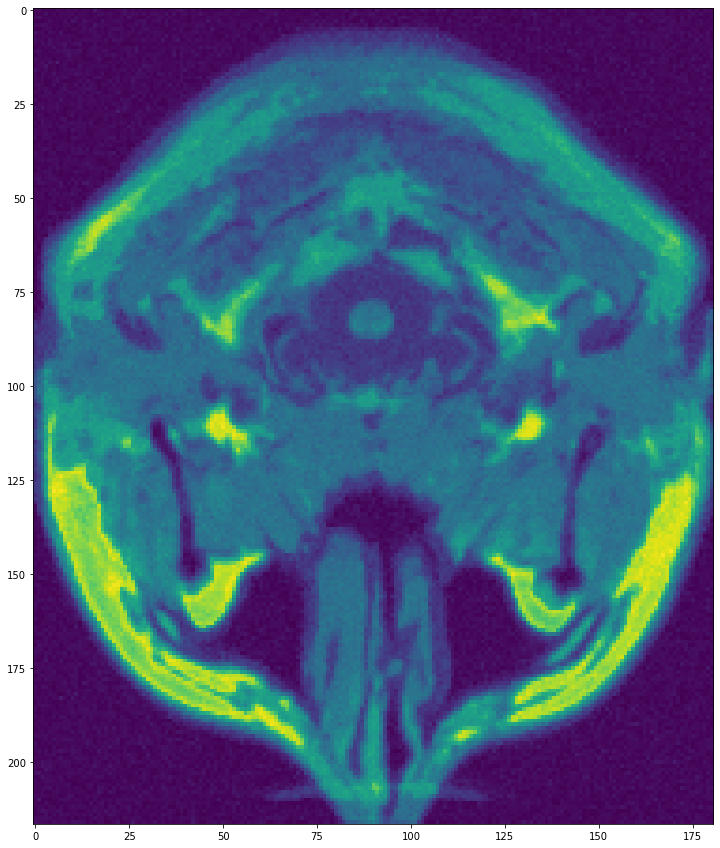

In [14]:
plt.figure(figsize=(15, 15))
plt.imshow(image)

In [15]:
# from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [24]:
blocked = lib.extract_patches_2d(image, (4, 4))

/home/alexkkir/ai-masters/linal/project/lib/blocks_github.py:187: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


In [25]:
blocked.shape

(38092, 4, 4)

In [28]:
blocked = blocked.reshape(-1, 16)

In [53]:
7/30

0.23333333333333334

In [29]:
aksvd = ApproximateKSVD(n_components=30, transform_n_nonzero_coefs=7)
dictionary = aksvd.fit(blocked).components_
gamma = aksvd.transform(blocked)
error = np.abs(gamma @ dictionary - blocked).mean()
print(error, (gamma != 0).sum() / gamma.size)
restored = gamma @ dictionary

21.32693350060615 0.23333333333333334


In [32]:
merged = lib.reconstruct_from_patches_2d(restored.reshape(-1, 4, 4), image.shape)

In [33]:
merged.shape

(217, 181)

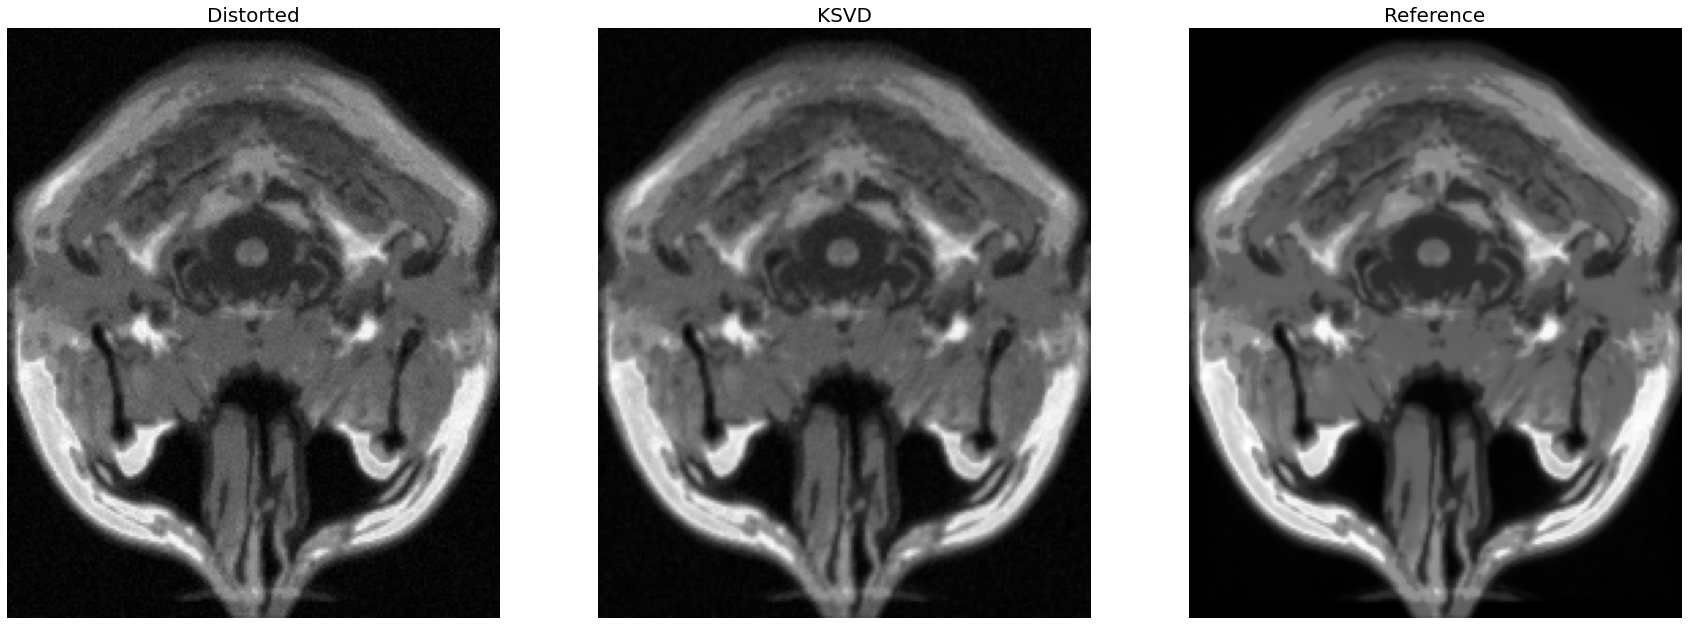

In [52]:
plt.figure(figsize=(30, 40))

plt.subplot(1, 3, 1)
plt.title('Distorted', fontsize=20)
plt.imshow(data_dis[0], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('KSVD', fontsize=20)
plt.imshow(merged, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Reference', fontsize=20)
plt.imshow(data_ref[0], cmap='gray')
plt.axis('off')

plt.show()